# Leistungsnachweis Sex Ratio bei Neugeborenen


Gruppe: Larissa Trüb, Kaj Suter, Harini Murugadas







# Struktur

1. Fragestellung und Datenbeschaffung
- 1.1 Titel
- 1.2 Fragestellung
- 1.3 Datenquellen
- 1.4 Daten Beschaffen und Laden

2. Daten Vorbereiten

- 2.1 Aufarbeitung der Daten
- 2.2 Durchschnitt aller Werte pro Land

3. Statistik der Rohdaten

- 3.1 Statistik der Roh-Daten
- 3.2 Ranking der Top / Bottom Länder
- 3.3 Analyse Jahre

4. Analyse

- 4.1 Vorgehen
- 4.2 Beobachtung
- 4.3 Interpretation
- 4.4 Berechnung
- 4.5 Visualisierung


# 1.0 Fragestellung und Datenbeschaffung


## 1.1 Titel
Sex-Ratio bei Neugeborenen

## 1.2 Fragestellung

- Wie ist die Sex-Ratio bei neugeborenen weltweit(männer per 100 frauen)

- Welche Länder haben im verlauf der letzten 70 Jahre die höchste / tiefste Sex ratio 

- Wie ist der verlauf  in den ländern mit der höchsten / tiefsten Sex-Ratio 

## 1.3 Datenquelle

- https://ourworldindata.org/gender-ratio#the-sex-ratio-through-the-lifespan

## 1.4 Datenbeschaffen und Laden

In [1]:
!pip install pandas
# same wiw anderes install file, brauchen wir eigentlich nicht, drum evt löschen sobalt ok von Lehrer


In [2]:
!pip install matplotlib #evtl löschen weil not wichtig

ERROR: Invalid requirement: '#evtl': Expected package name at the start of dependency specifier
    #evtl
    ^


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('sex-ratio-by-age.csv')
df

,Entity,Code,Year,Sex ratio - Sex: all - Age: 100+ - Variant: estimates,Sex ratio - Sex: all - Age: 15 - Variant: estimates,Sex ratio - Sex: all - Age: 20 - Variant: estimates,Sex ratio - Sex: all - Age: 30 - Variant: estimates,Sex ratio - Sex: all - Age: 40 - Variant: estimates,Sex ratio - Sex: all - Age: 50 - Variant: estimates,Sex ratio - Sex: all - Age: 60 - Variant: estimates,Sex ratio - Sex: all - Age: 70 - Variant: estimates,Sex ratio - Sex: all - Age: 80 - Variant: estimates,Sex ratio - Sex: all - Age: 90 - Variant: estimates,Sex ratio - Sex: all - Age: 0 - Variant: estimates,Sex ratio - Sex: all - Age: 5 - Variant: estimates
0,Afghanistan,AFG,1968,0.000000,102.662500,97.910730,109.851990,117.310936,112.465280,105.552440,105.66334,104.997955,90.551180,102.65285,102.49344
1,Afghanistan,AFG,1969,0.000000,102.742650,97.990710,109.973060,116.286060,112.366450,105.287780,105.13091,104.541830,89.552240,102.72480,102.53677
2,Afghanistan,AFG,1970,0.000000,102.822940,101.223076,109.889430,115.048350,112.357190,105.401030,104.86775,103.828310,88.732390,102.78504,102.58434
3,Afghanistan,AFG,1971,0.000000,102.897480,103.002106,109.319580,113.884026,112.236970,105.495620,104.59296,103.035980,87.333336,102.84169,102.63091
4,Afghanistan,AFG,1972,100.000000,102.968400,103.052050,108.538540,112.700360,111.966835,105.687410,104.45997,102.470030,86.163520,102.90349,102.69773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Zimbabwe,ZWE,2019,23.333334,99.663820,93.417220,82.785385,75.930190,71.420480,75.216720,75.28502,67.108270,44.087257,101.60976,101.06155
18940,Zimbabwe,ZWE,2020,22.413794,99.801544,94.578940,82.798294,77.868340,67.444890,75.489136,74.32036,64.850490,44.033413,101.65868,101.17913
18941,Zimbabwe,ZWE,2021,21.698112,99.964800,95.559350,83.175150,79.547180,65.142380,75.877890,73.33779,62.993103,43.899290,101.70158,101.29033
18942,Zimbabwe,ZWE,2022,22.772278,100.239320,96.767170,83.273186,80.918564,64.334380,76.431150,72.26028,61.730362,44.275864,101.74549,101.40425


# 2 Daten Vorbereiten

## 2.1 Aufarbeitung der Daten

In [5]:
df = pd.read_csv('sex-ratio-by-age.csv', skiprows=1,
    names=['Gebiet', 'Code', 'Jahr', 'Sex-ratio-100+', 'Sex-ratio-15','Sex-ratio-20','Sex-ratio-30','Sex-ratio-40','Sex-ratio-50','Sex-ratio-60','Sex-ratio-70','Sex-ratio-80','Sex-ratio-90','Sex-ratio-0','Sex-ratio-5', ])
df.head()

,Gebiet,Code,Jahr,Sex-ratio-100+,Sex-ratio-15,Sex-ratio-20,Sex-ratio-30,Sex-ratio-40,Sex-ratio-50,Sex-ratio-60,Sex-ratio-70,Sex-ratio-80,Sex-ratio-90,Sex-ratio-0,Sex-ratio-5
0,Afghanistan,AFG,1968,0.0,102.66250,97.910730,109.85199,117.310936,112.465280,105.55244,105.66334,104.997955,90.551180,102.65285,102.49344
1,Afghanistan,AFG,1969,0.0,102.74265,97.990710,109.97306,116.286060,112.366450,105.28778,105.13091,104.541830,89.552240,102.72480,102.53677
2,Afghanistan,AFG,1970,0.0,102.82294,101.223076,109.88943,115.048350,112.357190,105.40103,104.86775,103.828310,88.732390,102.78504,102.58434
3,Afghanistan,AFG,1971,0.0,102.89748,103.002106,109.31958,113.884026,112.236970,105.49562,104.59296,103.035980,87.333336,102.84169,102.63091
4,Afghanistan,AFG,1972,100.0,102.96840,103.052050,108.53854,112.700360,111.966835,105.68741,104.45997,102.470030,86.163520,102.90349,102.69773


In [6]:
df_pivot_J = df.pivot(index='Jahr', columns='Gebiet' , values='Sex-ratio-0',)  
df_pivot_J.head()   #zeigt die sexratio bei neugeborenen an, longformat noch machen

Gebiet,Afghanistan,Africa (UN),Albania,Algeria,American Samoa,Americas (UN),Andorra,Angola,Anguilla,Antigua and Barbuda,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
1950,99.845600,102.487770,107.240234,105.02744,104.947914,103.466200,104.545456,101.03405,100.000000,101.606420,...,105.744680,100.00000,103.302900,105.151276,104.093570,101.606420,104.25755,102.400480,99.93533,101.501630
1951,101.636910,101.763930,105.321050,103.28106,106.106870,103.289950,104.545456,100.53360,98.360660,102.448456,...,105.416664,100.00000,103.287100,105.176080,104.000000,101.492540,104.05600,101.221954,99.71938,101.302666
1952,101.716720,101.798134,105.858315,103.33156,107.712080,103.142430,104.545456,100.54841,98.437500,102.414230,...,105.544360,100.00000,103.253220,105.209220,104.395610,101.612900,104.06030,101.314330,99.75934,101.328340
1953,101.792810,101.833600,105.981370,103.39492,108.947365,103.058815,104.651160,100.55333,98.473280,102.377975,...,105.539360,100.00000,103.200730,105.223920,104.145080,101.404495,104.08865,101.403250,99.78541,101.346725
1954,101.880745,101.867294,105.268670,103.44020,109.333336,103.066315,104.347824,100.56513,99.242424,102.460020,...,105.633804,133.33333,103.173325,105.213520,103.960396,101.736970,104.10876,101.509480,99.79996,101.364510


In [7]:
df_pivot_G = df.pivot(index='Gebiet', columns='Jahr' , values='Sex-ratio-0',)  
df_pivot_G.head()

Jahr,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,99.845600,101.63691,101.716720,101.792810,101.880745,101.957344,102.020935,102.087944,102.14868,102.19366,...,105.01245,104.969520,104.89165,104.79966,104.730380,104.65933,104.60698,104.571960,104.554530,104.529960
Africa (UN),102.487770,101.76393,101.798134,101.833600,101.867294,101.896180,101.925020,101.954285,101.98125,102.00501,...,102.83395,102.830680,102.86149,102.89031,102.897920,102.88951,102.87919,102.854770,102.893166,102.931046
Albania,107.240234,105.32105,105.858315,105.981370,105.268670,103.991165,104.258320,105.278694,105.32550,104.39282,...,109.39195,109.142136,108.85467,108.64445,108.450615,108.19627,107.92708,107.600280,107.285860,107.019070
Algeria,105.027440,103.28106,103.331560,103.394920,103.440200,103.464780,103.480220,103.481964,103.47551,103.46479,...,104.23405,104.144300,104.06785,104.06009,104.112600,104.18491,104.23399,104.259970,104.278244,104.291750
American Samoa,104.947914,106.10687,107.712080,108.947365,109.333336,108.994705,107.772020,107.853400,109.60000,110.61008,...,104.44444,103.541664,102.34541,100.86580,98.908295,96.28821,99.75961,105.945946,105.801100,105.698006


# 3.Statistik der Rohdaten 

In [8]:
df.dtypes 

Gebiet             object
Code               object
Jahr                int64
Sex-ratio-100+    float64
Sex-ratio-15      float64
Sex-ratio-20      float64
Sex-ratio-30      float64
Sex-ratio-40      float64
Sex-ratio-50      float64
Sex-ratio-60      float64
Sex-ratio-70      float64
Sex-ratio-80      float64
Sex-ratio-90      float64
Sex-ratio-0       float64
Sex-ratio-5       float64
dtype: object

## 3.1 Analyse der Länder
- anzahl datensätze pro land, 
- anzahl gebiete
- Balkendiagramm aller werte weltweit

In [9]:
# Anzahl Gebiete 
print ( 'Anzahl verschiedener Gebiete;', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete; 256


In [10]:
# Anzahl datensatz pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan       74
Africa (UN)       74
Albania           74
Algeria           74
American Samoa    74
                  ..
Western Sahara    74
World             74
Yemen             74
Zambia            74
Zimbabwe          74
Name: count, Length: 256, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

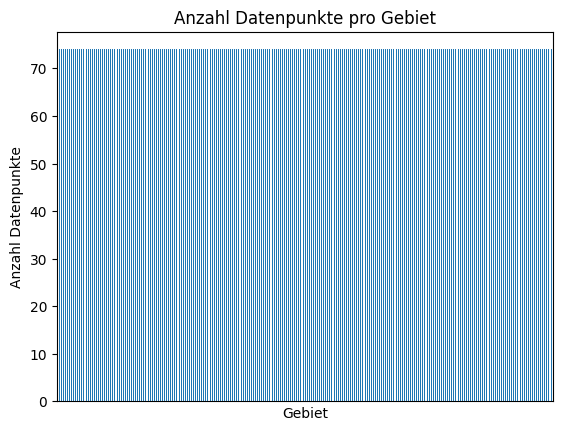

In [11]:
# Balkendiagramm aller länder, x=land y= anzahl daten punkte
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')



## 3.2 Analyse Jahre
- anzahl jahre, in denen gemessen wurde , unsere range
- anzahl datensätze pro jahr
- markierung in der grafik in welchem jahr die meisten datensätze zur verfügung standen
- grafik in dem gezeigt wird, vieviele datensätze pro jahr es gab


zeitverlauf über 70 jahre eines top und bot land
2 mal verlaufsdiagram
x achse jahre, y achase sex ration --> punkt mit linienverbundenens Diagramm

In [12]:
# anzahl jahre, in denen gemessen wurde , unsere range
print('Anzahl verschiedener Jahre:', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre: 74


In [13]:
# - anzahl datensätze pro jahr
df['Jahr'].value_counts().sort_index()


Jahr
1950    256
1951    256
1952    256
1953    256
1954    256
       ... 
2019    256
2020    256
2021    256
2022    256
2023    256
Name: count, Length: 74, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Jahr'}, xlabel='Jahr', ylabel='Anzahl Datenpunkte'>

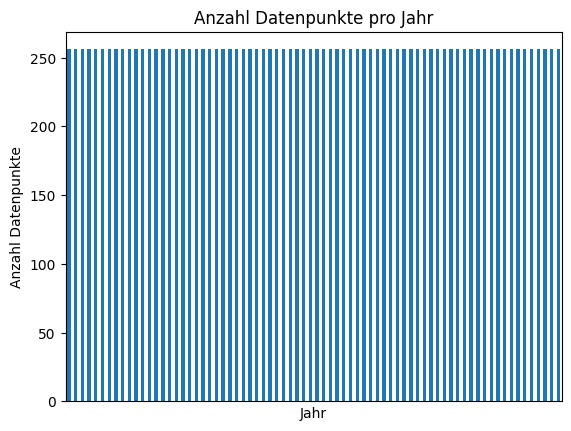

In [14]:
# - grafik in dem gezeigt wird, vieviele datensätze pro jahr es gab
df['Jahr'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr')

## 3.3 Analyse der Sex ratio

- mean jedes einzelnen landes anhand aller deren verfügbaren datensätze
- Rankint top / Bottom 5 Länder (höchste / tiefste sex ratio)


In [15]:
# mean jedes einzelnen landes anhand aller deren verfügbaren datensätze

df_mean = df_pivot_G.mean(axis=1).reset_index()
df_mean.columns = ["Land", "Durchschnitt"]
df_mean.head()


# Wir Brauchen das zum berechnen der referenzline, letzte grafik?  daraus muss noch der mean von allen werten berechnet werden.= weltweite sexratio bei geburt

,Land,Durchschnitt
0,Afghanistan,103.773053
1,Africa (UN),102.601197
2,Albania,106.228224
3,Algeria,104.441907
4,American Samoa,106.509309


In [16]:
# Weltweiter durchschnitt der sex ratio
worldmean = df_mean['Durchschnitt'].mean()
worldmean
# evt noch schön verpacken

np.float64(104.34928581725084)

In [17]:
#- - Rankint top  5 Länder (höchste  sex ratio)

top10 = df_mean.sort_values(by="Durchschnitt", ascending=False).head(10)
top10   #Top 10 Länder mit den meisten männern geburt


,Land,Durchschnitt
247,Vatican,111.711712
45,China,110.121751
236,Tuvalu,109.815565
239,United Arab Emirates,109.023235
172,Northern Mariana Islands,108.474430
215,South Korea,108.358797
224,Taiwan,108.342542
33,Brunei,108.200236
16,Azerbaijan,107.959209
11,Armenia,107.875037


In [18]:
# - Ranking Bottom 5 Länder ( tiefste sex ratio)
bottom10 = df_mean.sort_values(by="Durchschnitt", ascending=True).head(10)
bottom10  #Bot 10 Länder mit den meisten frauen geurten

,Land,Durchschnitt
138,Malawi,99.624132
159,Namibia,99.735663
254,Zambia,99.779537
8,Anguilla,100.277599
157,Mozambique,100.402854
72,Falkland Islands,100.441463
192,Saint Barthelemy,100.791246
79,Gabon,100.869403
57,Democratic Republic of Congo,100.937595
114,Kenya,101.020122


In [19]:
# Top 5 Länder (höchster Durchschnitt)
top5 = df_mean.sort_values(by="Durchschnitt", ascending=False).head(5)

# Bottom 5 Länder (tiefster Durchschnitt)
bottom5 = df_mean.sort_values(by="Durchschnitt", ascending=True).head(5)

# Nur die Ländernamen als Liste
top5_lands = list(top5["Land"])
bottom5_lands = list(bottom5["Land"])

# Zusammen: 10 Länder
selected_countries = top5_lands + bottom5_lands
selected_countries

['Vatican',
 'China',
 'Tuvalu',
 'United Arab Emirates',
 'Northern Mariana Islands',
 'Malawi',
 'Namibia',
 'Zambia',
 'Anguilla',
 'Mozambique']

# 3.4

Tabelle 

Verlauf der länder top 5
Verlauf der länder bot 5

# 4. Analyse


## 4.1 Vorgehen

- abklären mit informatik lehrer


## 4.2 Beobachtungen

- was sehen wir in unserer grafik
Anguilla hat besonders tiefe und der Vatikan besonders hohe werte




- grobe interpätation der daten ohne recherche

### Ausreisser nach unten
in Tabelle 4.4 kann man erkennen, dass Anguilla im Jahr 1983 einen abfall in der sexratio auf 84.88 hatte, Vergleicht man diese nun mit den jahren davor und danach, könnte man argumentieren, da aguilla ein kleiner inselstaat ist mit wenig geburten, da die Sexratio stärker schwanken kann


https://database.earth/population/anguilla


In [36]:
angu = df_pivot_G.loc["Anguilla"].astype(float)
year_min = angu.idxmin()
val_min  = angu.min()
year_min, val_min


(np.int64(1983), np.float64(84.88372))

In [35]:
angu.loc[year_min-2:year_min+2]


Jahr
1981    90.243904
1982    86.046510
1983    84.883720
1984    90.361440
1985    98.765434
Name: Anguilla, dtype: float64

### Ausreisser nach Oben
In der Tabelle von Kapitel 4.4 kann man erkennen, dass der Vatikan einig sehr starke peaks hat und sich ansonsten immer nur auf der 0 lineie hält. vergleicht mann nun die geburten raten mit der sexratio at birth so kann man erkennen das es lediglich in den jahren

--- dies ist nur die these von kaj und noch nicht nachgewiesen.

### China im Verlauf

beim betrachten der tabelle 4.4 kann man erkennen, dass China einen starken anstieg der sexratio erfuhr vo..(jahr stst des peak) bis es sich im (jahr wo kurve wieder abflacht(kontrolle mit der einkind politik)) und der peak im jahr..mit  ist.

In [38]:
# GPT experiment von kaj
china = df_pivot_G.loc["China"].dropna().astype(float)

peak_year  = int(china.idxmax())
peak_value = float(china.max())

# "Start des Anstiegs": erstes Jahr, ab dem China >107 liegt (Schwelle kannst du anpassen)
start_year = int(china[china > 107].index.min())

# "Abflachen": erstes Jahr nach dem Peak, ab dem es für 5 Jahre am Stück nicht mehr steigt
post = china.loc[peak_year:]
d = post.diff()
abflach_year = next((int(y) for y in d.index[1:] if (d.loc[y:y+4] <= 0).all()), None)

start_year, abflach_year, peak_year, peak_value


(1983, 2007, 2006, 117.48244)

## 4.3 Interpretation
- rechereche mit quellen angabe genaue peaks angeben 




## 4.4 Berechnung
- 



tabellen vergleich: grösste vs kleinste sex ratio wie im Beispiel von Samuel

## 4.5 Visualisierung
#Grafik  Lebenserwartung: x : jahr y: sex ratio aller top und bot 5, (evtl ereignisse einzeichen)



In [20]:
import matplotlib.pyplot as plt

# ---------------------------------------
# 1) Farbcodes für deine 10 Länder
# ---------------------------------------
color_dict = {
    'Vatican': 'blue',
    'China': 'cyan',
    'Tuvalu': 'lightgreen',
    'United Arab Emirates': 'red',
    'Northern Mariana Islands': 'orange',
    'Malawi': 'yellow',
    'Namibia': 'brown',
    'Zambia': 'pink',
    'Anguilla': 'purple',
    'Mozambique': 'green'
}

# ---------------------------------------
# 2) Differenzen pro Land berechnen
#    (letztes Jahr - erstes Jahr)
# ---------------------------------------
diffs = {}

first_year = df_pivot.columns[0]     # z.B. 1950
last_year = df_pivot.columns[-1]     # z.B. 2020

for gebiet in color_dict.keys():
    values = df_pivot.loc[gebiet]
    diffs[gebiet] = values.loc[last_year] - values.loc[first_year]

# ---------------------------------------
# 3) Plot erstellen
# ---------------------------------------

plt.figure(figsize=(10, 8))

for gebiet in color_dict.keys():
    diff = diffs[gebiet]
    
    g = df_pivot.loc[gebiet].plot(
        label=f'{gebiet} – Diff. {int(last_year)}-{int(first_year)}: {diff:.2f}',
        color=color_dict[gebiet],
        linewidth=2
    )

plt.title("Sex Ratio Entwicklung – Top 5 & Bottom 5 Länder")
plt.xlabel("Jahr")
plt.ylabel("Sex Ratio")

plt.xlim([1950, 2025])   # Falls deine Daten bei 1950 starten
plt.ylim([80, 130])      # typischer Bereich für Sex-Ratio Werte

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



NameError: name 'df_pivot' is not defined

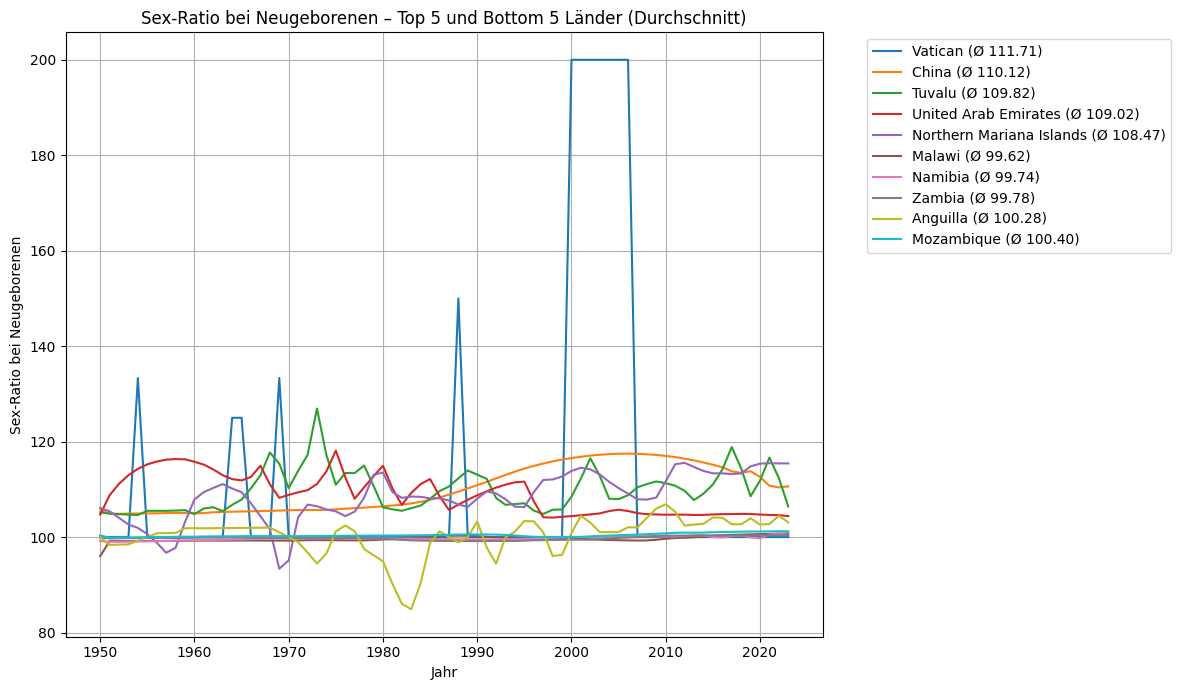

In [ ]:
import matplotlib.pyplot as plt # zeile löschen 

plt.figure(figsize=(12, 7))

years = df_pivot.columns  # x-Achse: Jahre aus der Pivot-Tabelle

for land in selected_countries:
    # Werte für dieses Land über alle Jahre
    y_values = df_pivot.loc[land]
    
    # Durchschnittswert für die Legende nachschauen
    avg = df_mean.loc[df_mean["Land"] == land, "Durchschnitt"].iloc[0]
    
    # Linie zeichnen
    plt.plot(years, y_values, label=f"{land} (Ø {avg:.2f})")

plt.xlabel("Jahr")
plt.ylabel("Sex-Ratio bei Neugeborenen")
plt.title("Sex-Ratio bei Neugeborenen – Top 5 und Bottom 5 Länder (Durchschnitt)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# mit hilfe chatgpt

In [23]:
# Kaj probiert aus

color_dict = {
    'Vatican': 'blue',
    'China': 'cyan',
    'Tuvalu': 'lightgreen',
    'United Arab Emirates': 'green',
    'Northern Marian Islands': 'red',
    'Namibia': 'orange',
    'Malawi': 'yellow',
    'Zambia': 'brown',
    'Anguilla': 'pink',
    'Mozambique': 'purple'
}

for gebiet in df_pivot_G:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Sex ratio bei Neugeborenen', xlabel='Jahr', ylabel=f'Sex ratio', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1980,2025], ylim=[0,80],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots



KeyError: 1950

(80.0, 230.0)

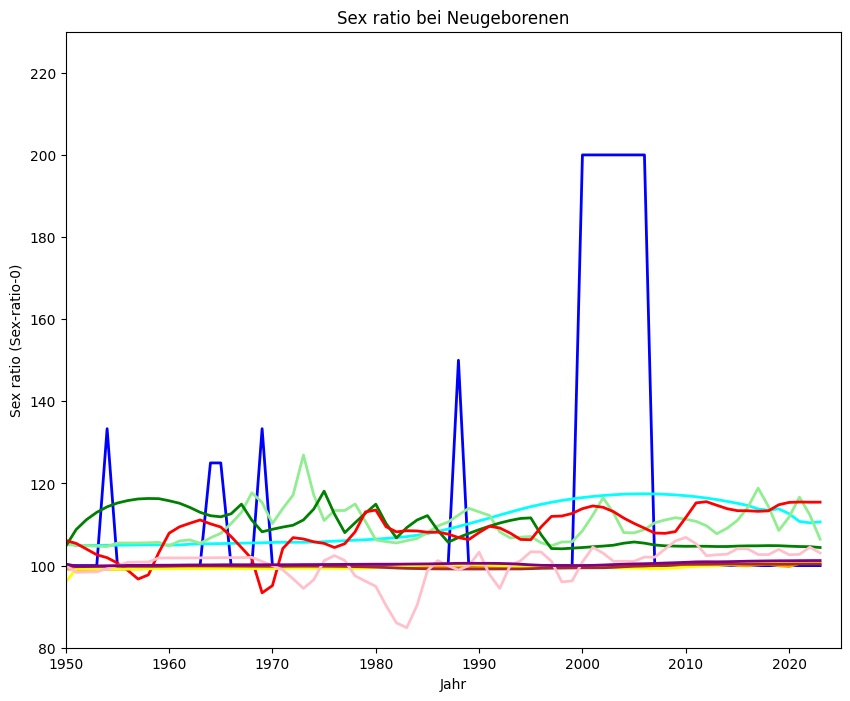

In [30]:
# Experiment kaj gpt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- deine 10 Länder + Farben (korrigierter Name: Northern Mariana Islands) ---
color_dict = {
    'Vatican': 'blue',
    'China': 'cyan',
    'Tuvalu': 'lightgreen',
    'United Arab Emirates': 'green',
    'Northern Mariana Islands': 'red',
    'Namibia': 'orange',
    'Malawi': 'yellow',
    'Zambia': 'brown',
    'Anguilla': 'pink',
    'Mozambique': 'purple'
}

Gebiets_liste = list(color_dict.keys())

# --- df_pivot_G: sicherstellen, dass die Jahre numerisch & sortiert sind ---
df_pivot_G = df_pivot_G.copy()
df_pivot_G.columns = pd.to_numeric(df_pivot_G.columns, errors="coerce")
df_pivot_G = df_pivot_G.sort_index(axis=1)

years = df_pivot_G.columns

# --- Diff 2021 - 2011 berechnen (robust, falls Jahre fehlen) ---
y2021 = df_pivot_G[2021] if 2021 in df_pivot_G.columns else pd.Series(index=df_pivot_G.index, dtype=float)
y2011 = df_pivot_G[2011] if 2011 in df_pivot_G.columns else pd.Series(index=df_pivot_G.index, dtype=float)
diffs = y2021 - y2011

# --- EIN Diagramm mit allen 10 Linien ---
fig, ax = plt.subplots(figsize=(10, 8))

for gebiet in Gebiets_liste:
    if gebiet not in df_pivot_G.index:
        print(f"Warnung: {gebiet} nicht gefunden – übersprungen.")
        continue

    y = pd.to_numeric(df_pivot_G.loc[gebiet], errors="coerce")
    diff = diffs.loc[gebiet]
    diff_txt = f"{diff:.2f}" if pd.notna(diff) else "n/a"

    ax.plot(
        years, y,
        label=f"{gebiet} - Diff. 2021-2011: {diff_txt}",
        color=color_dict.get(gebiet, None),
        linewidth=2
    )

ax.set_title("Sex ratio bei Neugeborenen")
ax.set_xlabel("Jahr")
ax.set_ylabel("Sex ratio (Sex-ratio-0)")
ax.set_xlim(1950, 2025)     # ggf. auf 1980,2025 ändern wie in deinem Beispiel
ax.set_ylim(80, 230)        # typischer Bereich für Sex Ratio




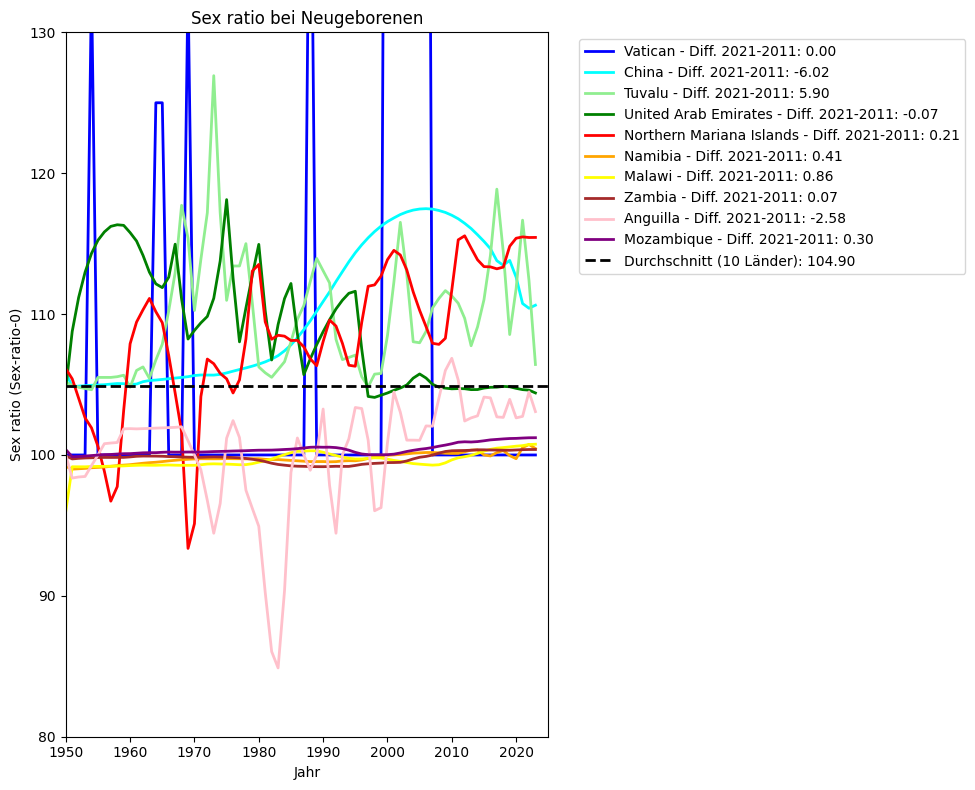

In [32]:
# Test kaj gpt
# --- Farben + 10 Länder (korrigiert: Northern Mariana Islands) ---
color_dict = {
    'Vatican': 'blue',
    'China': 'cyan',
    'Tuvalu': 'lightgreen',
    'United Arab Emirates': 'green',
    'Northern Mariana Islands': 'red',
    'Namibia': 'orange',
    'Malawi': 'yellow',
    'Zambia': 'brown',
    'Anguilla': 'pink',
    'Mozambique': 'purple'
}
Gebiets_liste = list(color_dict.keys())

# --- Pivot muss bei dir schon existieren: df_pivot_G (Index=Länder, Columns=Jahre) ---
df_pivot_G = df_pivot_G.copy()
df_pivot_G.columns = pd.to_numeric(df_pivot_G.columns, errors="coerce")
df_pivot_G = df_pivot_G.sort_index(axis=1)
years = df_pivot_G.columns

# --- Diff 2021 - 2011 (für Legende) ---
y2021 = df_pivot_G[2021] if 2021 in df_pivot_G.columns else pd.Series(index=df_pivot_G.index, dtype=float)
y2011 = df_pivot_G[2011] if 2011 in df_pivot_G.columns else pd.Series(index=df_pivot_G.index, dtype=float)
diffs = y2021 - y2011

# --- Durchschnittslinie (über alle Werte der 10 Länder & alle Jahre) ---
avg_value = df_pivot_G.loc[Gebiets_liste].stack().mean()

# --- Plot: alle 10 Länder in EINER Grafik ---
fig, ax = plt.subplots(figsize=(10, 8))

for gebiet in Gebiets_liste:
    if gebiet not in df_pivot_G.index:
        print(f"Warnung: {gebiet} nicht gefunden – übersprungen.")
        continue

    y = pd.to_numeric(df_pivot_G.loc[gebiet, years], errors="coerce")
    diff = diffs.loc[gebiet]
    diff_txt = f"{diff:.2f}" if pd.notna(diff) else "n/a"

    ax.plot(
        years, y,
        label=f"{gebiet} - Diff. 2021-2011: {diff_txt}",
        color=color_dict.get(gebiet, None),
        linewidth=2
    )

# horizontale Durchschnittslinie
ax.axhline(avg_value, linestyle="--", color="black", linewidth=2,
           label=f"Durchschnitt (10 Länder): {avg_value:.2f}")

ax.set_title("Sex ratio bei Neugeborenen")
ax.set_xlabel("Jahr")
ax.set_ylabel("Sex ratio (Sex-ratio-0)")
ax.set_xlim(1950, 2025)   # falls du 1980-2025 willst: ax.set_xlim(1980, 2025)
ax.set_ylim(80, 130)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
